# conceptual:


## 1: Describe the null hypotheses to which the p-values given in Table 3.4 correspond. Explain what conclusions you can draw based on these p-values. Your explanation should be phrased in terms of sales, TV, radio, and newspaper, rather than in terms of the coefficients of the linear model.

<img src="table_3-4.png">


The first p-value indicates whether the intercept is significant. That is, given the variance observed in this data, is it likely that the null hypothesis is correct, that these things have no impact on sales... now it's interesting, because the intercept value is what you get when all the predictors are zero. So, does this indicate that the mean of sales is significantly different from zero? Boring.

The second p-value is much more useful. It indicates that the coefficient for TV is significant, meaning, the effect of TV on sales is greater than we would expect by chance, at least in this model.

The same for the third and 4th, except newspapers' coef isn't significant at all. So its contribution to sales appears to be no greater than chance in this model.

## 2: Carefully explain the differences between the KNN classifier andKNN regression methods.

In a KNN classifier, you are identifying the k nearest neighbors, and each is giving a vote for their class membership, with majority winning. In a KNN regression, you are doing the same, but the neighbors are contributing their value which is then averaged.

## 3: Suppose we have a data set with five predictors,
    X1 = GPA, 
    X2 = IQ, 
    X3 =Gender (1 for Female and 0 forMale), 
    X4 =Interaction between GPA and IQ, and 
    X5 = Interaction between GPA and Gender. 
    The response is starting salary after graduation (in thousands of dollars). Suppose we use least squares to fit the model, and get 
    β0 = 50, 
    β1 = 20, 
    β2 = 0.07, 
    β3 = 35,  
    β4 = 0.01, 
    β5 = −10.
   

### a) which answer is correct and why?
    -  so since female is 1, X3 can be rephrase "impact of being female", and it appears to be significantly higher for females, however, there is an interaction between GPA and being female, which seems to be having an impact. Might be something like, women at high GPA earn more than men, while women at low GPA earn less than men.
    
    So, that would be iv.
    
### b) predict the salary of a female (what are you ferengi?) with IQ of 110, and GPA of 4.0.
    Salary = 50 + 20*(4.0) + .07(110) + 1 (35) + (4*110).01 - 4.0 * 1 (10)
    Which works out to 137.1, or 137100 starting salary. This did not happen to me. Guess 3.88 wasn't enough. :P
    
### c) since the coefficient for GPA/IQ is very small, there is little evidence of interaction.
    I would say this is false, because of the scale of the IQ term, and the scale of the predictor variable. anything that's going to have to be multiplied by 100 isn't going to be too big, or it'd be having way TOO large an effect.
    

## 4: I collect a set of data (n = 100 observations) containing a single predictor and a quantitative response. I then fit a linear regression model to the data, as well as a separate cubic regression, i.e. Y = β0 +β1X +β2X2 +β3X3 +error.

### a) Suppose that the true relationship between X and Y is linear, i.e. Y = β0 + β1X + ǫ. Consider the training residual sum of squares (RSS) for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.
    - we would expect training to be lower, because the cubic is a more flexible model, and will be able to "explain more" even though that will actually just be overfitting to variability in the training set, irreflective of the true relationship.

### b) answer (a) using test rather than training 
    - we would expect the test RSS to be lower for linear, because the cubic regression will have to try to accomodate terms that don't match the true relationship.
    
### c) Suppose that the true relationship between X and Y is not linear, but we don’t know how far it is from linear. Consider the training RSS for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.   
    -  In this case, the training RSS for cubic regression should still be lower... unless it's exactly the midpoint between a linear and a cubic relationship. is that mathematically possible?
    
### d) answer (b) using test rather than training 
    - is this not the same as c? 

## 5 : no idea what they want here. whatever.

## 6: Using (3.4), argue that in the case of simple linear regression, the least squares line always passes through the point (x-bar, y-bar).

<img src="formula_3-4.png">

??? not sure on this one. skipping 7 too. pending calculus

# Applied

#auto dataset

In [126]:
#auto dataset
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

In [127]:
df=pd.read_csv("../islir_exercises/islir_data/Auto.csv")
auto_df=df

In [128]:
df=pd.read_csv("../islir_exercises/islir_data/Auto.csv")
auto_df=df
no_ques_auto_df=auto_df[df.horsepower != '?']
print(auto_df.shape)
print(no_ques_auto_df.shape)
auto_df=no_ques_auto_df
y = auto_df.mpg.astype(int)

X = auto_df.horsepower.astype(int)

(397, 9)
(392, 9)


In [129]:
#convert horsepower to numeric
#auto_df.horsepower.astype(int)

In [130]:
#predict mpg using horsepower
y = auto_df.mpg.astype(int)

X = auto_df.horsepower.astype(int)
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

In [131]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     603.6
Date:                Wed, 20 Dec 2017   Prob (F-statistic):           3.27e-81
Time:                        12:54:55   Log-Likelihood:                -1174.9
No. Observations:                 392   AIC:                             2354.
Df Residuals:                     390   BIC:                             2362.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.6690      0.711     55.819      0.0

### Assessing the results:
    - R-squared of .64 is pretty good. Moreover, the coefficient for horsepower is significant. So yes, there is a relationship, a positive relationship.... such that as horsepower goes up, mpg goes up? that seems wrong.
    - statsmodels, what are you ON about? Apparently I have to add.
    "X = sm.add_constant(X)" before modelling, and then it will give me one of the most fundamental parts of one of the most fundamental models in history?
    
    - anyway. This massively changes the interpretation! Good! So.
    - It's still significant, but now there's a negative relationship. Also, the R-squared has gone down slightly. Still significant though.'
    
    

In sum, then:
    There is a significant negative relationship between mpg and horsepower, such that with every additional 1 horsepower, mpg decreases by 0.1568.

### What is the predicted mpg associated with a horsepower of 98? What are the associated 95% confidence and prediction intervals?
- running into some trouble with this one. I've fit a model, meaning I have my coefficients, and so I should be able to just calculate this, but that's not going to scale, so I want to see how statsmodels does it. There must be a way...



In [132]:
print(results.params)
answer = results.params[0]+ (results.params[1]*98)
print(answer)


const         39.668988
horsepower    -0.156848
dtype: float64
24.2978744028


Is this the best way? WEll, it's they way that didn't take me forEVER. 95% conf intervals?


In [133]:
results.conf_int()

,0,1
const,38.271759,41.066217
horsepower,-0.169400,-0.144296


So what is that telling us? Well, a confidence interval is telling us, based on the variability in the data (And assuming a normal distribution), the interval in which we can expect the true value to fall 95% of the time. So to get the confidence interval for this estimate... I'm not sure this is right, but, the lowest it can be is the low 95% intercept + the low 95% coefficient, and the highest the same.

so then


In [134]:
results.conf_int()

,0,1
const,38.271759,41.066217
horsepower,-0.169400,-0.144296


In [135]:
print(results.conf_int()[0][0])
low_conf_const = results.conf_int()[0][0]
print(results.conf_int()[0][1])
low_conf_horse = results.conf_int()[0][1]
print(results.conf_int()[1][0])
high_conf_const = results.conf_int()[1][0]
print(results.conf_int()[1][1])
high_conf_horse = results.conf_int()[1][1]

38.2717586763
-0.169399810338
41.0662165172
-0.144296377292


In [136]:
low_conf_answer = low_conf_const + low_conf_horse*98
high_conf_answer = high_conf_const + high_conf_horse*98
print('95% conf interval = ', low_conf_answer, ' - ', high_conf_answer)

95% conf interval =  21.6705772631  -  26.9251715426


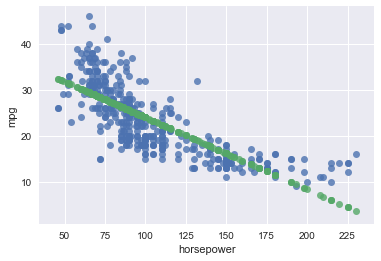

In [160]:
sns.regplot(auto_df.horsepower.astype(int),auto_df.mpg.astype(int),  fit_reg=False)
sns.regplot(auto_df.horsepower.astype(int),results.predict(), fit_reg=False)

[<matplotlib.text.Text at 0x116a6c320>, <matplotlib.text.Text at 0x116a69a90>]

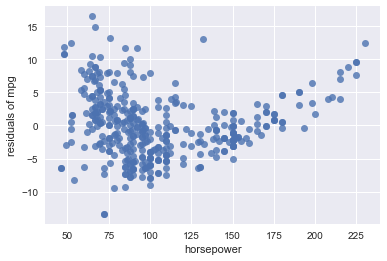

In [165]:
ax = sns.regplot(auto_df.horsepower.astype(int),results.resid,fit_reg=False)
ax.set(ylabel = 'residuals of mpg', xlabel = 'horsepower')

# There's a exponential trend in these residuals!!

## 9: 

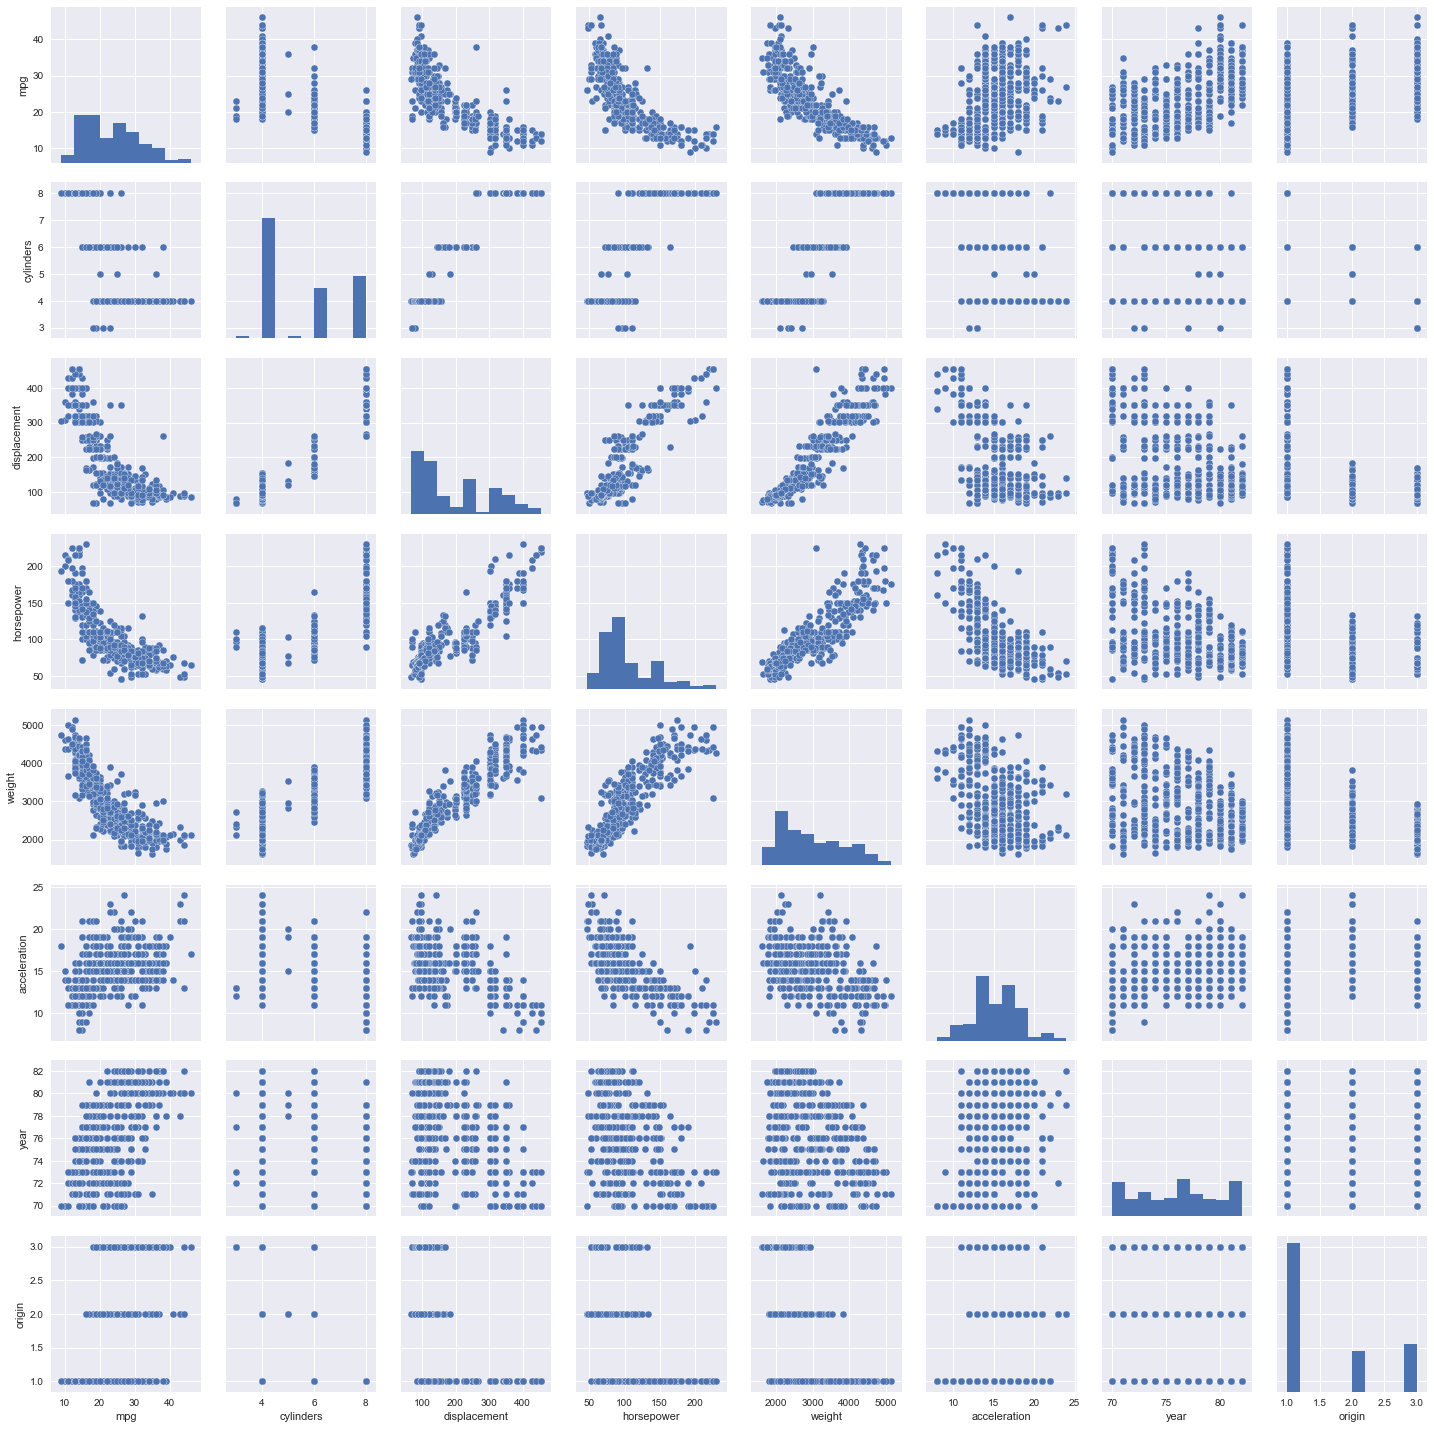

In [181]:
new_df = auto_df.drop(['name'], axis=1)
new_df = new_df.astype(int)
sns.pairplot(new_df)